In [1]:
import sys

from PIL import Image
from torch.utils.data import BatchSampler
from torchvision import transforms
import matplotlib.pyplot as plt
import random

sys.path.append("../")
from src.dataset import get_train_dataset, random_noise

/home/jayh/dev/py/DSPRO1/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


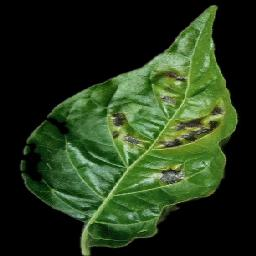

In [2]:
image = Image.open(
    "/home/jayh/dev/py/DSPRO1/data/val/Pepper,_bell___Bacterial_spot/1d89d58f-09d2-42ee-a9dc-11e51d0a1635___JR_B.Spot 8826_final_masked.jpg"
).convert("RGB")
image

In [3]:
tran = transforms.Compose(
    [
        transforms.RandomApply([
            transforms.Lambda(lambda x: random_noise(x, 5)),
        ]),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(15),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.ToTensor(),
        transforms.RandomErasing(),
        transforms.ToPILImage()
    ]
)

In [4]:
batch_size = 4
train_ds = get_train_dataset()
sampler = BatchSampler(train_ds, batch_size, False)

In [5]:
batch = random.randint(0, len(train_ds) // batch_size)
for i, imgs in enumerate(sampler):
    if i == batch:
        break

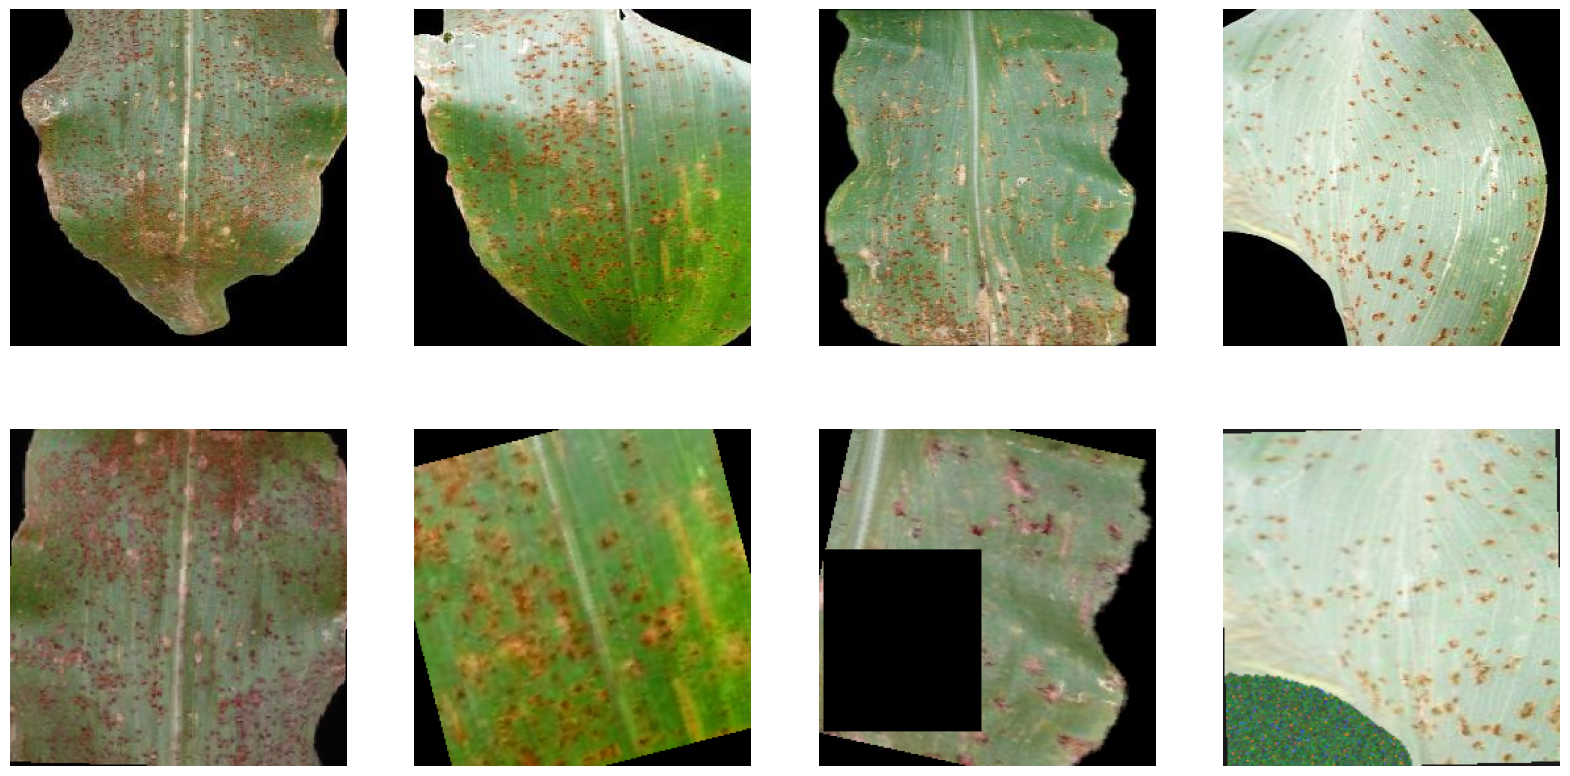

In [17]:
f, ax = plt.subplots(2, batch_size, figsize=(20, 10))
for i in range(batch_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(imgs[i][0])
    ax[1][i].imshow(tran(imgs[i][0]))
